<a href="https://colab.research.google.com/github/chaitu0018/Miniproject/blob/main/ML_miniproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Steps:
#Preprocess data
#Apply any algorithm with best parameters using grid search cv
#Confusion matrix,Classification report
#Predict for any new image

In [13]:
!mkdir Images

In [22]:
#Preprocess data
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
datadir = '/content/Images'
categories = ['doberman','golden_ret','shihtzu']
Input = []
output = []
for i in categories:
  array_ind = categories.index(i)
  path = os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resize = resize(img_array,(150,150,3))
    Input.append(np.ndarray.flatten(img_resize))
    output.append(array_ind)
Input = np.array(Input)
output = np.array(output)


In [23]:
#applying GridSearch CV
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
x_train,x_test,y_train,y_test = train_test_split(Input,output,random_state=0,stratify = output)
clf = SVC()
param = {
          'kernel':['linear','rbf','poly'],
          'C':[0.1,1,10,100]
        }
grid = GridSearchCV(clf,param,cv=5)
grid.fit(x_train,y_train)
grid.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [24]:
#The best grid parameters are C:0.1, kernel: linear
#Accuracy score
from sklearn.metrics import accuracy_score
clf = SVC(C=0.1,kernel = 'linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9375

In [25]:
#Confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_pred)

array([[6, 0, 0],
       [0, 6, 0],
       [0, 1, 3]])

In [26]:
#Classification report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         6\n           1       0.86      1.00      0.92         6\n           2       1.00      0.75      0.86         4\n\n    accuracy                           0.94        16\n   macro avg       0.95      0.92      0.93        16\nweighted avg       0.95      0.94      0.94        16\n'

In [27]:
#save the model
import pickle
pickle.dump(clf,open('img_models.p','wb'))


In [28]:
model = pickle.load(open('img_models.p','rb'))

Enter the URLhttps://i.pinimg.com/564x/50/b8/58/50b85861059302086333b7e7cd65cd63.jpg
(150, 150, 3)
Predicted output:shihtzu


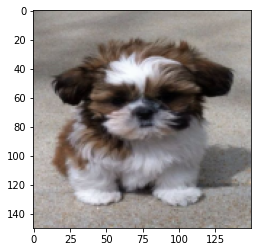

In [34]:
#predict for new image
Input = []

url = input('Enter the URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
Input.append(img_resized.flatten())
Input = np.array(Input)
print(img_resized.shape)
plt.imshow(img_resized)
y_out = clf.predict(Input)

y_out = categories[y_out[0]]

print(f'Predicted output:{y_out}')
